In [1]:
from keras.preprocessing.image import ImageDataGenerator
import keras
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG19
import shutil

2023-11-24 22:58:59.620160: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-24 22:58:59.620219: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
!mkdir /home/abhi/MP/sign_data/english_dataset

!mkdir /home/abhi/MP/sign_data/english_dataset/Train
!mkdir /home/abhi/MP/sign_data/english_dataset/Test

!mkdir /home/abhi/MP/sign_data/english_dataset/Train/Fake
!mkdir /home/abhi/MP/sign_data/english_dataset/Train/Real

!mkdir /home/abhi/MP/sign_data/english_dataset/Test/Fake
!mkdir /home/abhi/MP/sign_data/english_dataset/Test/Real

In [ ]:
PATH = "/home/abhi/MP/sign_data/english/train"

for i in os.listdir(PATH):
    try:
        source_path = os.path.join(PATH, i)

        if os.path.isdir(source_path):
            # For directories
            destination_path = os.path.join("/home/abhi/MP/sign_data/english_dataset/Train/Real" if "forg" not in i else "/home/abhi/MP/sign_data/english_dataset/Train/Fake", i)
            shutil.copytree(source_path, destination_path)
        else:
            # For files
            destination_path = os.path.join("/home/abhi/MP/sign_data/english_dataset/Train/Real" if "forg" not in i else "/home/abhi/MP/sign_data/english_dataset/Train/Fake", i)
            shutil.copy(source_path, destination_path)
    except Exception as e:
        print(f"Error: {e}")

In [ ]:
PATH = "/home/abhi/MP/sign_data/english/test/"

for i in os.listdir(PATH):
    try:
        source_path = os.path.join(PATH, i)

        if os.path.isdir(source_path):
            # For directories
            destination_path = os.path.join("/home/abhi/MP/sign_data/english_dataset/Test/Real" if "forg" not in i else "/home/abhi/MP/sign_data/english_dataset/Test/Fake", i)
            shutil.copytree(source_path, destination_path)
        else:
            # For files
            destination_path = os.path.join("/home/abhi/MP/sign_data/english_dataset/Test/Real" if "forg" not in i else "/home/abhi/MP/sign_data/english_dataset/Test/Fake", i)
            shutil.copy(source_path, destination_path)
    except Exception as e:
        print(f"Error: {e}")

In [2]:
current_directory = os.getcwd()
train_dir = os.path.join(current_directory, "/home/abhi/MP/sign_data/english_dataset/Train")
test_dir = os.path.join(current_directory, "/home/abhi/MP/sign_data/english_dataset/Test")

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(200, 200),
                                                    batch_size=64,
                                                    class_mode='binary')


Found 1664 images belonging to 2 classes.


In [5]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(200, 200),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 500 images belonging to 2 classes.


Label :  1.0


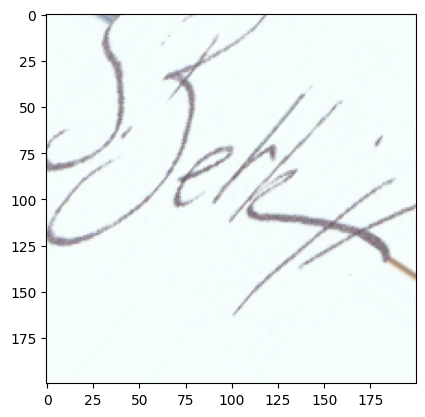

In [6]:
plt.imshow(train_generator[0][0][6])
print("Label : ",train_generator[0][1][6])

Label :  0.0


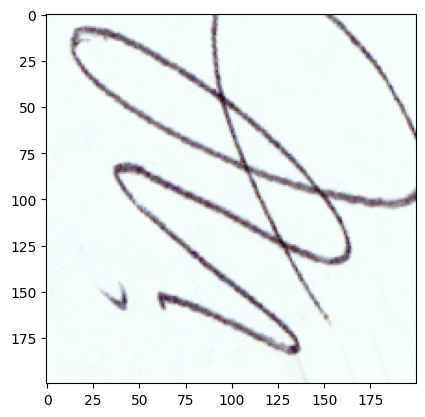

In [7]:
plt.imshow(train_generator[0][0][61])
print("Label : ",train_generator[0][1][61])

In [8]:
# VGG16 model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
for layer in base_model.layers:
    layer.trainable = False
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


2023-11-24 23:00:07.802804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-24 23:00:07.803133: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-24 23:00:07.803286: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-11-24 23:00:07.803385: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-11-24 23:00:07.803523: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [9]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=30,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size,
                    verbose=2)


Epoch 1/30


2023-11-24 23:00:13.385752: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655360000 exceeds 10% of free system memory.
2023-11-24 23:00:13.706456: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655360000 exceeds 10% of free system memory.
2023-11-24 23:00:22.227010: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655360000 exceeds 10% of free system memory.
2023-11-24 23:00:22.432510: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655360000 exceeds 10% of free system memory.
2023-11-24 23:00:31.847760: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 655360000 exceeds 10% of free system memory.


26/26 - 257s - loss: 2.0302 - accuracy: 0.4826 - val_loss: 0.7224 - val_accuracy: 0.5000 - 257s/epoch - 10s/step
Epoch 2/30
26/26 - 265s - loss: 0.6268 - accuracy: 0.6575 - val_loss: 0.5389 - val_accuracy: 0.7854 - 265s/epoch - 10s/step
Epoch 3/30
26/26 - 250s - loss: 0.5525 - accuracy: 0.7500 - val_loss: 0.4893 - val_accuracy: 0.7896 - 250s/epoch - 10s/step
Epoch 4/30
26/26 - 257s - loss: 0.5169 - accuracy: 0.7500 - val_loss: 0.4752 - val_accuracy: 0.7729 - 257s/epoch - 10s/step
Epoch 5/30
26/26 - 253s - loss: 0.4633 - accuracy: 0.7903 - val_loss: 0.3945 - val_accuracy: 0.8625 - 253s/epoch - 10s/step
Epoch 6/30
26/26 - 256s - loss: 0.4143 - accuracy: 0.8239 - val_loss: 0.3632 - val_accuracy: 0.8729 - 256s/epoch - 10s/step
Epoch 7/30
26/26 - 257s - loss: 0.3824 - accuracy: 0.8534 - val_loss: 0.3590 - val_accuracy: 0.8521 - 257s/epoch - 10s/step
Epoch 8/30
26/26 - 256s - loss: 0.3706 - accuracy: 0.8419 - val_loss: 0.3944 - val_accuracy: 0.8042 - 256s/epoch - 10s/step
Epoch 9/30
26/26 - 

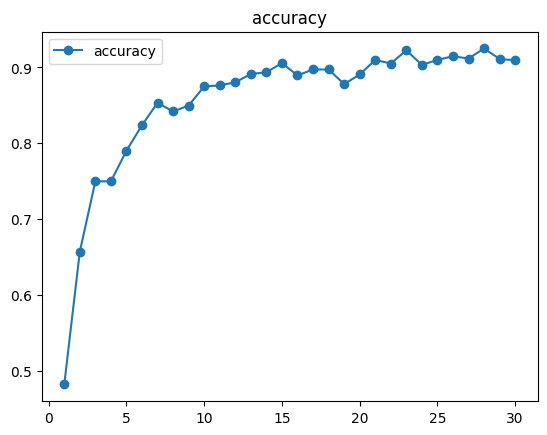

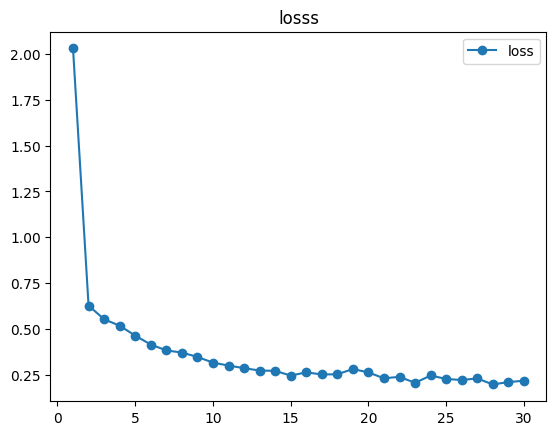

In [10]:
acc = history.history["accuracy"]
loss = history.history["loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "-o", label="accuracy")
plt.title("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "-o", label="loss")
plt.title("losss")
plt.legend()
plt.show()

In [11]:
model.save("/home/abhi/MP/VGG16_english_model.h5")

In [12]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc*100}')

16/16 [==============================] - 57s 4s/step - loss: 0.3014 - accuracy: 0.8440
Test Accuracy: 84.3999981880188


In [16]:
pip install opencv-python


     |████████████████████████████████| 61.7 MB 1.1 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [17]:
import cv2
import numpy as np


In [18]:
image = cv2.imread('/home/abhi/MP/real.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/home/abhi/MP/real_gray.jpg', gray_image)

True

In [55]:
image = cv2.imread('/home/abhi/MP/test/aman_real.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/home/abhi/MP/aman_real_gray.jpg', gray_image)

True

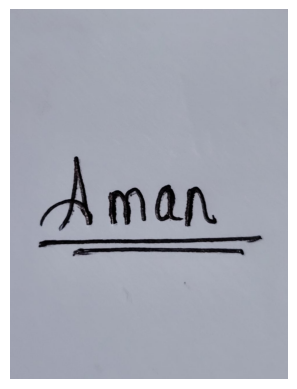

Similarity score: 95.20569443702698%
Valid Signature


In [74]:
image_path = '/home/abhi/MP/real.jpg'

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()



img = cv2.imread('/home/abhi/MP/real_gray.jpg')
img = cv2.resize(img, (200, 200))
img = img / 255.0
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print("Similarity score: {}%".format(pred[0][0]*100))
if pred >= 0.85:
    print("Valid Signature")
else:
    print("Invalid Signature")

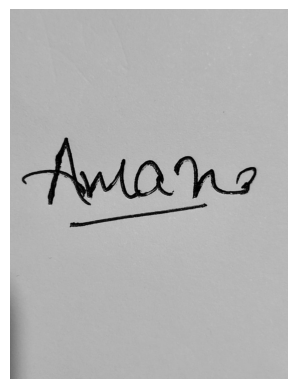

Similarity score: 68.63863468170166%
Invalid Signature


In [75]:
img = cv2.imread('/home/abhi/MP/3_gray.jpg')
img = cv2.resize(img, (200, 200))
img = img / 255.0
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
image_path = '/home/abhi/MP/3_gray.jpg'


image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
print("Similarity score: {}%".format(pred[0][0]*100))
if pred >= 0.85:
    print("Valid Signature")
else:
    print("Invalid Signature")

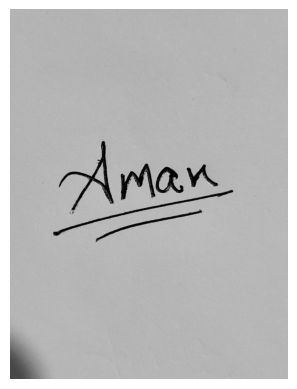

Similarity score: 14.557471871376038%
Invalid Signature


In [76]:
img = cv2.imread('/home/abhi/MP/prateek_forg_gray.jpg')
img = cv2.resize(img, (200, 200))
img = img / 255.0
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
image_path = '/home/abhi/MP/prateek_forg_gray.jpg'


image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
print("Similarity score: {}%".format(pred[0][0]*100))
if pred >= 0.85:
    print("Valid Signature")
else:
    print("Invalid Signature")

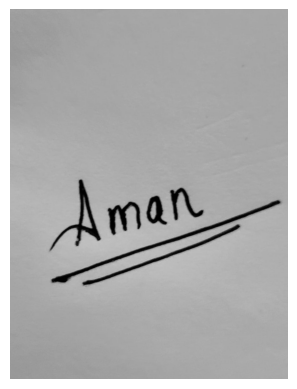

Similarity score: 34.02031064033508%
Invalid Signature


In [77]:
img = cv2.imread('/home/abhi/MP/Mahato_forg_gray.jpg')
img = cv2.resize(img, (200, 200))
img = img / 255.0
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
image_path = '/home/abhi/MP/Mahato_forg_gray.jpg'


image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
print("Similarity score: {}%".format(pred[0][0]*100))
if pred >= 0.85:
    print("Valid Signature")
else:
    print("Invalid Signature")

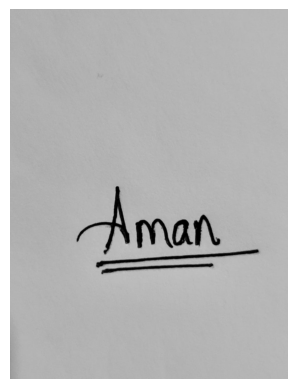

Similarity score: 87.07190155982971%
Valid Signature


In [78]:
img = cv2.imread('/home/abhi/MP/aman_real_gray.jpg')
img = cv2.resize(img, (200, 200))
img = img / 255.0
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
image_path = '/home/abhi/MP/aman_real_gray.jpg'


image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
print("Similarity score: {}%".format(pred[0][0]*100))
if pred >= 0.85:
    print("Valid Signature")
else:
    print("Invalid Signature")